# Exploración de Archivos Excel - Cartera de Inversiones

Este notebook está diseñado para explorar y analizar los contenidos de los archivos Excel relacionados con la cartera de inversiones:
- `Datos_historicos_de_la_cartera.xlsx`
- `Ratios Managment financiero cartera.xlsx`

El objetivo es entender la estructura, contenido y relaciones entre estos archivos para facilitar análisis posteriores de drawdown y performance financiera.

## 1. Import Required Libraries

Importamos las librerías necesarias para el análisis de datos y manipulación de archivos Excel.

In [8]:
# Librerías principales para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# Configuración de pandas para mostrar más información
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Librerías importadas exitosamente")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ Librerías importadas exitosamente
✓ Pandas version: 2.2.3
✓ NumPy version: 2.1.3


## 2. Load Excel Files

Cargamos ambos archivos Excel y verificamos que se lean correctamente.

In [9]:
# Definir las rutas de los archivos
archivo_datos_historicos = r"c:\Users\trico\OneDrive\UBA\Management Financiero Bursatil\Cartera final\Datos_historicos_de_la_cartera.xlsx"
archivo_ratios = r"c:\Users\trico\OneDrive\UBA\Management Financiero Bursatil\Cartera final\Ratios Managment financiero cartera.xlsx"

print("🔄 Cargando archivos Excel...")

try:
    # Intentar cargar los archivos Excel
    # Primero vemos qué hojas tienen cada archivo
    xl_datos_historicos = pd.ExcelFile(archivo_datos_historicos)
    xl_ratios = pd.ExcelFile(archivo_ratios)
    
    print(f"📊 Archivo 'Datos_historicos_de_la_cartera.xlsx' contiene las hojas: {xl_datos_historicos.sheet_names}")
    print(f"📈 Archivo 'Ratios Managment financiero cartera.xlsx' contiene las hojas: {xl_ratios.sheet_names}")
    
    # Cargar todas las hojas de cada archivo
    datos_historicos_sheets = {}
    for sheet in xl_datos_historicos.sheet_names:
        datos_historicos_sheets[sheet] = pd.read_excel(xl_datos_historicos, sheet_name=sheet)
        print(f"  ✓ Hoja '{sheet}' cargada: {datos_historicos_sheets[sheet].shape}")
    
    ratios_sheets = {}
    for sheet in xl_ratios.sheet_names:
        ratios_sheets[sheet] = pd.read_excel(xl_ratios, sheet_name=sheet)
        print(f"  ✓ Hoja '{sheet}' cargada: {ratios_sheets[sheet].shape}")
    
    print("\n✅ Todos los archivos se cargaron exitosamente!")
    
except FileNotFoundError as e:
    print(f"❌ Error: No se pudo encontrar el archivo - {e}")
except Exception as e:
    print(f"❌ Error al cargar archivos: {e}")

🔄 Cargando archivos Excel...
📊 Archivo 'Datos_historicos_de_la_cartera.xlsx' contiene las hojas: ['Hoja1']
📈 Archivo 'Ratios Managment financiero cartera.xlsx' contiene las hojas: ['Drawdown', 'VaR', 'VaR cond', 'Kelly criterion', 'Sharpe', 'Sortino', 'Alpha beta']
  ✓ Hoja 'Hoja1' cargada: (161, 12)
  ✓ Hoja 'Drawdown' cargada: (3, 5)
  ✓ Hoja 'VaR' cargada: (0, 0)
  ✓ Hoja 'VaR cond' cargada: (0, 0)
  ✓ Hoja 'Kelly criterion' cargada: (0, 0)
  ✓ Hoja 'Sharpe' cargada: (0, 0)
  ✓ Hoja 'Sortino' cargada: (0, 0)
  ✓ Hoja 'Alpha beta' cargada: (0, 0)

✅ Todos los archivos se cargaron exitosamente!


## 3. Explore Data Structure

Exploramos la estructura básica de cada hoja en ambos archivos Excel.

In [10]:
print("=" * 80)
print("📋 ANÁLISIS DE ESTRUCTURA - DATOS HISTÓRICOS DE LA CARTERA")
print("=" * 80)

for sheet_name, df in datos_historicos_sheets.items():
    print(f"\n🔍 HOJA: {sheet_name}")
    print(f"📏 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"📋 Columnas: {list(df.columns)}")
    print(f"🔢 Tipos de datos:")
    for col, dtype in df.dtypes.items():
        print(f"   {col}: {dtype}")
    print(f"❓ Valores nulos por columna:")
    null_counts = df.isnull().sum()
    for col, count in null_counts.items():
        if count > 0:
            print(f"   {col}: {count} ({count/len(df)*100:.1f}%)")
    if null_counts.sum() == 0:
        print("   ✅ No hay valores nulos")

print("\n" + "=" * 80)
print("📊 ANÁLISIS DE ESTRUCTURA - RATIOS MANAGEMENT FINANCIERO")
print("=" * 80)

for sheet_name, df in ratios_sheets.items():
    print(f"\n🔍 HOJA: {sheet_name}")
    print(f"📏 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"📋 Columnas: {list(df.columns)}")
    print(f"🔢 Tipos de datos:")
    for col, dtype in df.dtypes.items():
        print(f"   {col}: {dtype}")
    print(f"❓ Valores nulos por columna:")
    null_counts = df.isnull().sum()
    for col, count in null_counts.items():
        if count > 0:
            print(f"   {col}: {count} ({count/len(df)*100:.1f}%)")
    if null_counts.sum() == 0:
        print("   ✅ No hay valores nulos")

📋 ANÁLISIS DE ESTRUCTURA - DATOS HISTÓRICOS DE LA CARTERA

🔍 HOJA: Hoja1
📏 Dimensiones: 161 filas × 12 columnas
📋 Columnas: ['Fecha', 'AAPL', 'Retorno_AAPL', 'SPY', 'Retorno_SPY', 'EWZ', 'Retorno_EWZ', 'CEPU', 'Retorno_CEPU', 'Tipo_Cambio_ARSUSD', 'Retorno_FX', 'Tasa_PlazoFijo_Diaria']
🔢 Tipos de datos:
   Fecha: datetime64[ns]
   AAPL: float64
   Retorno_AAPL: float64
   SPY: float64
   Retorno_SPY: float64
   EWZ: float64
   Retorno_EWZ: float64
   CEPU: int64
   Retorno_CEPU: float64
   Tipo_Cambio_ARSUSD: float64
   Retorno_FX: float64
   Tasa_PlazoFijo_Diaria: float64
❓ Valores nulos por columna:
   Tipo_Cambio_ARSUSD: 161 (100.0%)
   Retorno_FX: 161 (100.0%)
   Tasa_PlazoFijo_Diaria: 161 (100.0%)

📊 ANÁLISIS DE ESTRUCTURA - RATIOS MANAGEMENT FINANCIERO

🔍 HOJA: Drawdown
📏 Dimensiones: 3 filas × 5 columnas
📋 Columnas: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
🔢 Tipos de datos:
   Unnamed: 0: float64
   Unnamed: 1: object
   Unnamed: 2: object
   Unname

## 4. Display Basic Information

Mostramos una vista previa de los datos de cada hoja para entender su contenido.

In [11]:
print("=" * 100)
print("📄 VISTA PREVIA DE DATOS - DATOS HISTÓRICOS DE LA CARTERA")
print("=" * 100)

for sheet_name, df in datos_historicos_sheets.items():
    print(f"\n🔍 HOJA: {sheet_name}")
    print("-" * 50)
    
    # Mostrar las primeras filas
    print("📝 Primeras 5 filas:")
    print(df.head())
    
    # Mostrar estadísticas descriptivas para columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📊 Estadísticas descriptivas (columnas numéricas):")
        print(df[numeric_cols].describe())
    
    # Mostrar información sobre fechas si las hay
    date_cols = df.select_dtypes(include=['datetime64', 'object']).columns
    for col in date_cols:
        try:
            # Intentar convertir a datetime si parece ser una fecha
            if df[col].dtype == 'object':
                sample_values = df[col].dropna().head()
                print(f"\n📅 Muestra de valores en '{col}': {sample_values.tolist()}")
        except:
            pass
    
    print("\n" + "="*50)

print("\n" + "=" * 100)
print("📊 VISTA PREVIA DE DATOS - RATIOS MANAGEMENT FINANCIERO")
print("=" * 100)

for sheet_name, df in ratios_sheets.items():
    print(f"\n🔍 HOJA: {sheet_name}")
    print("-" * 50)
    
    # Mostrar las primeras filas
    print("📝 Primeras 5 filas:")
    print(df.head())
    
    # Mostrar estadísticas descriptivas para columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📊 Estadísticas descriptivas (columnas numéricas):")
        print(df[numeric_cols].describe())
    
    # Mostrar información sobre fechas si las hay
    date_cols = df.select_dtypes(include=['datetime64', 'object']).columns
    for col in date_cols:
        try:
            if df[col].dtype == 'object':
                sample_values = df[col].dropna().head()
                print(f"\n📅 Muestra de valores en '{col}': {sample_values.tolist()}")
        except:
            pass
    
    print("\n" + "="*50)

📄 VISTA PREVIA DE DATOS - DATOS HISTÓRICOS DE LA CARTERA

🔍 HOJA: Hoja1
--------------------------------------------------
📝 Primeras 5 filas:
       Fecha     AAPL  Retorno_AAPL       SPY  Retorno_SPY      EWZ  \
0 2025-01-03  14350.0      0.005254  34974.93     0.018195  13275.0   
1 2025-01-06  14525.0      0.012195  35299.93     0.009292  13600.0   
2 2025-01-07  14375.0     -0.010327  35124.93    -0.004958  13800.0   
3 2025-01-08  14400.0      0.001739  35074.93    -0.001423  13625.0   
4 2025-01-09  14375.0     -0.001736  35524.93     0.012830  13925.0   

   Retorno_EWZ  CEPU  Retorno_CEPU  Tipo_Cambio_ARSUSD  Retorno_FX  \
0    -0.007477  1895      0.041209                 NaN         NaN   
1     0.024482  1900      0.002639                 NaN         NaN   
2     0.014706  1920      0.010526                 NaN         NaN   
3    -0.012681  1875     -0.023438                 NaN         NaN   
4     0.022018  1870     -0.002667                 NaN         NaN   

   Tasa_P

## 5. Compare Excel Files

Comparamos los archivos para identificar columnas comunes, diferencias y posibles relaciones.

In [12]:
print("=" * 80)
print("🔄 COMPARACIÓN ENTRE ARCHIVOS EXCEL")
print("=" * 80)

# Obtener todas las columnas de cada archivo
all_cols_historicos = set()
all_cols_ratios = set()

for sheet_name, df in datos_historicos_sheets.items():
    all_cols_historicos.update(df.columns)

for sheet_name, df in ratios_sheets.items():
    all_cols_ratios.update(df.columns)

print(f"📊 Total de columnas únicas en 'Datos Históricos': {len(all_cols_historicos)}")
print(f"📈 Total de columnas únicas en 'Ratios Management': {len(all_cols_ratios)}")

# Encontrar columnas comunes
common_cols = all_cols_historicos.intersection(all_cols_ratios)
if common_cols:
    print(f"\n🤝 Columnas comunes entre archivos ({len(common_cols)}):")
    for col in sorted(common_cols):
        print(f"   • {col}")
else:
    print("\n❌ No se encontraron columnas comunes entre archivos")

# Columnas únicas de cada archivo
unique_historicos = all_cols_historicos - all_cols_ratios
unique_ratios = all_cols_ratios - all_cols_historicos

if unique_historicos:
    print(f"\n📊 Columnas únicas en 'Datos Históricos' ({len(unique_historicos)}):")
    for col in sorted(unique_historicos):
        print(f"   • {col}")

if unique_ratios:
    print(f"\n📈 Columnas únicas en 'Ratios Management' ({len(unique_ratios)}):")
    for col in sorted(unique_ratios):
        print(f"   • {col}")

# Análisis de fechas potenciales
print(f"\n📅 ANÁLISIS DE COLUMNAS DE FECHA:")
date_keywords = ['fecha', 'date', 'tiempo', 'time', 'día', 'day', 'mes', 'month', 'año', 'year']

for sheet_name, df in datos_historicos_sheets.items():
    potential_dates = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in date_keywords)]
    if potential_dates:
        print(f"   📊 {sheet_name}: {potential_dates}")

for sheet_name, df in ratios_sheets.items():
    potential_dates = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in date_keywords)]
    if potential_dates:
        print(f"   📈 {sheet_name}: {potential_dates}")

🔄 COMPARACIÓN ENTRE ARCHIVOS EXCEL
📊 Total de columnas únicas en 'Datos Históricos': 12
📈 Total de columnas únicas en 'Ratios Management': 5

❌ No se encontraron columnas comunes entre archivos

📊 Columnas únicas en 'Datos Históricos' (12):
   • AAPL
   • CEPU
   • EWZ
   • Fecha
   • Retorno_AAPL
   • Retorno_CEPU
   • Retorno_EWZ
   • Retorno_FX
   • Retorno_SPY
   • SPY
   • Tasa_PlazoFijo_Diaria
   • Tipo_Cambio_ARSUSD

📈 Columnas únicas en 'Ratios Management' (5):
   • Unnamed: 0
   • Unnamed: 1
   • Unnamed: 2
   • Unnamed: 3
   • Unnamed: 4

📅 ANÁLISIS DE COLUMNAS DE FECHA:
   📊 Hoja1: ['Fecha']


## 6. Data Analysis and Visualization

Creamos visualizaciones y análisis para entender los patrones en los datos.

📈 ANÁLISIS Y VISUALIZACIÓN DE DATOS

📊 ANÁLISIS DE DATOS HISTÓRICOS:

🔍 Analizando hoja: Hoja1


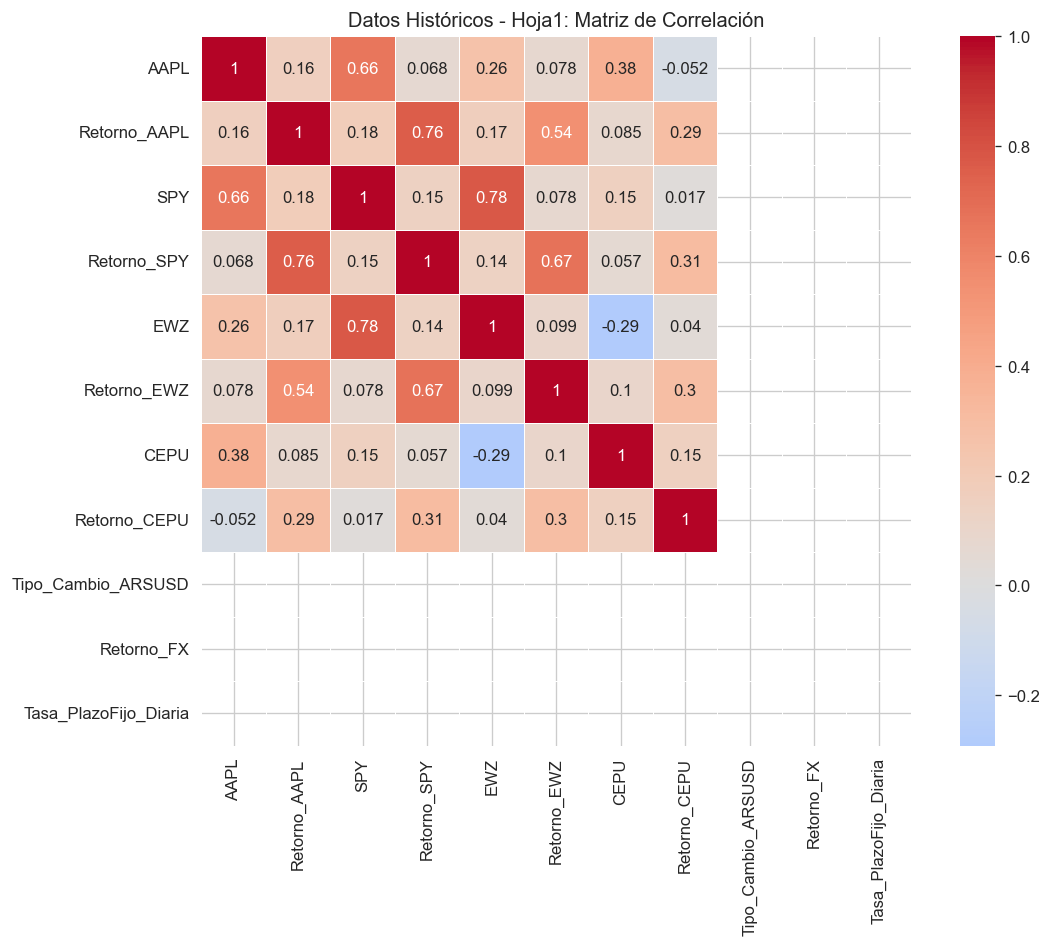

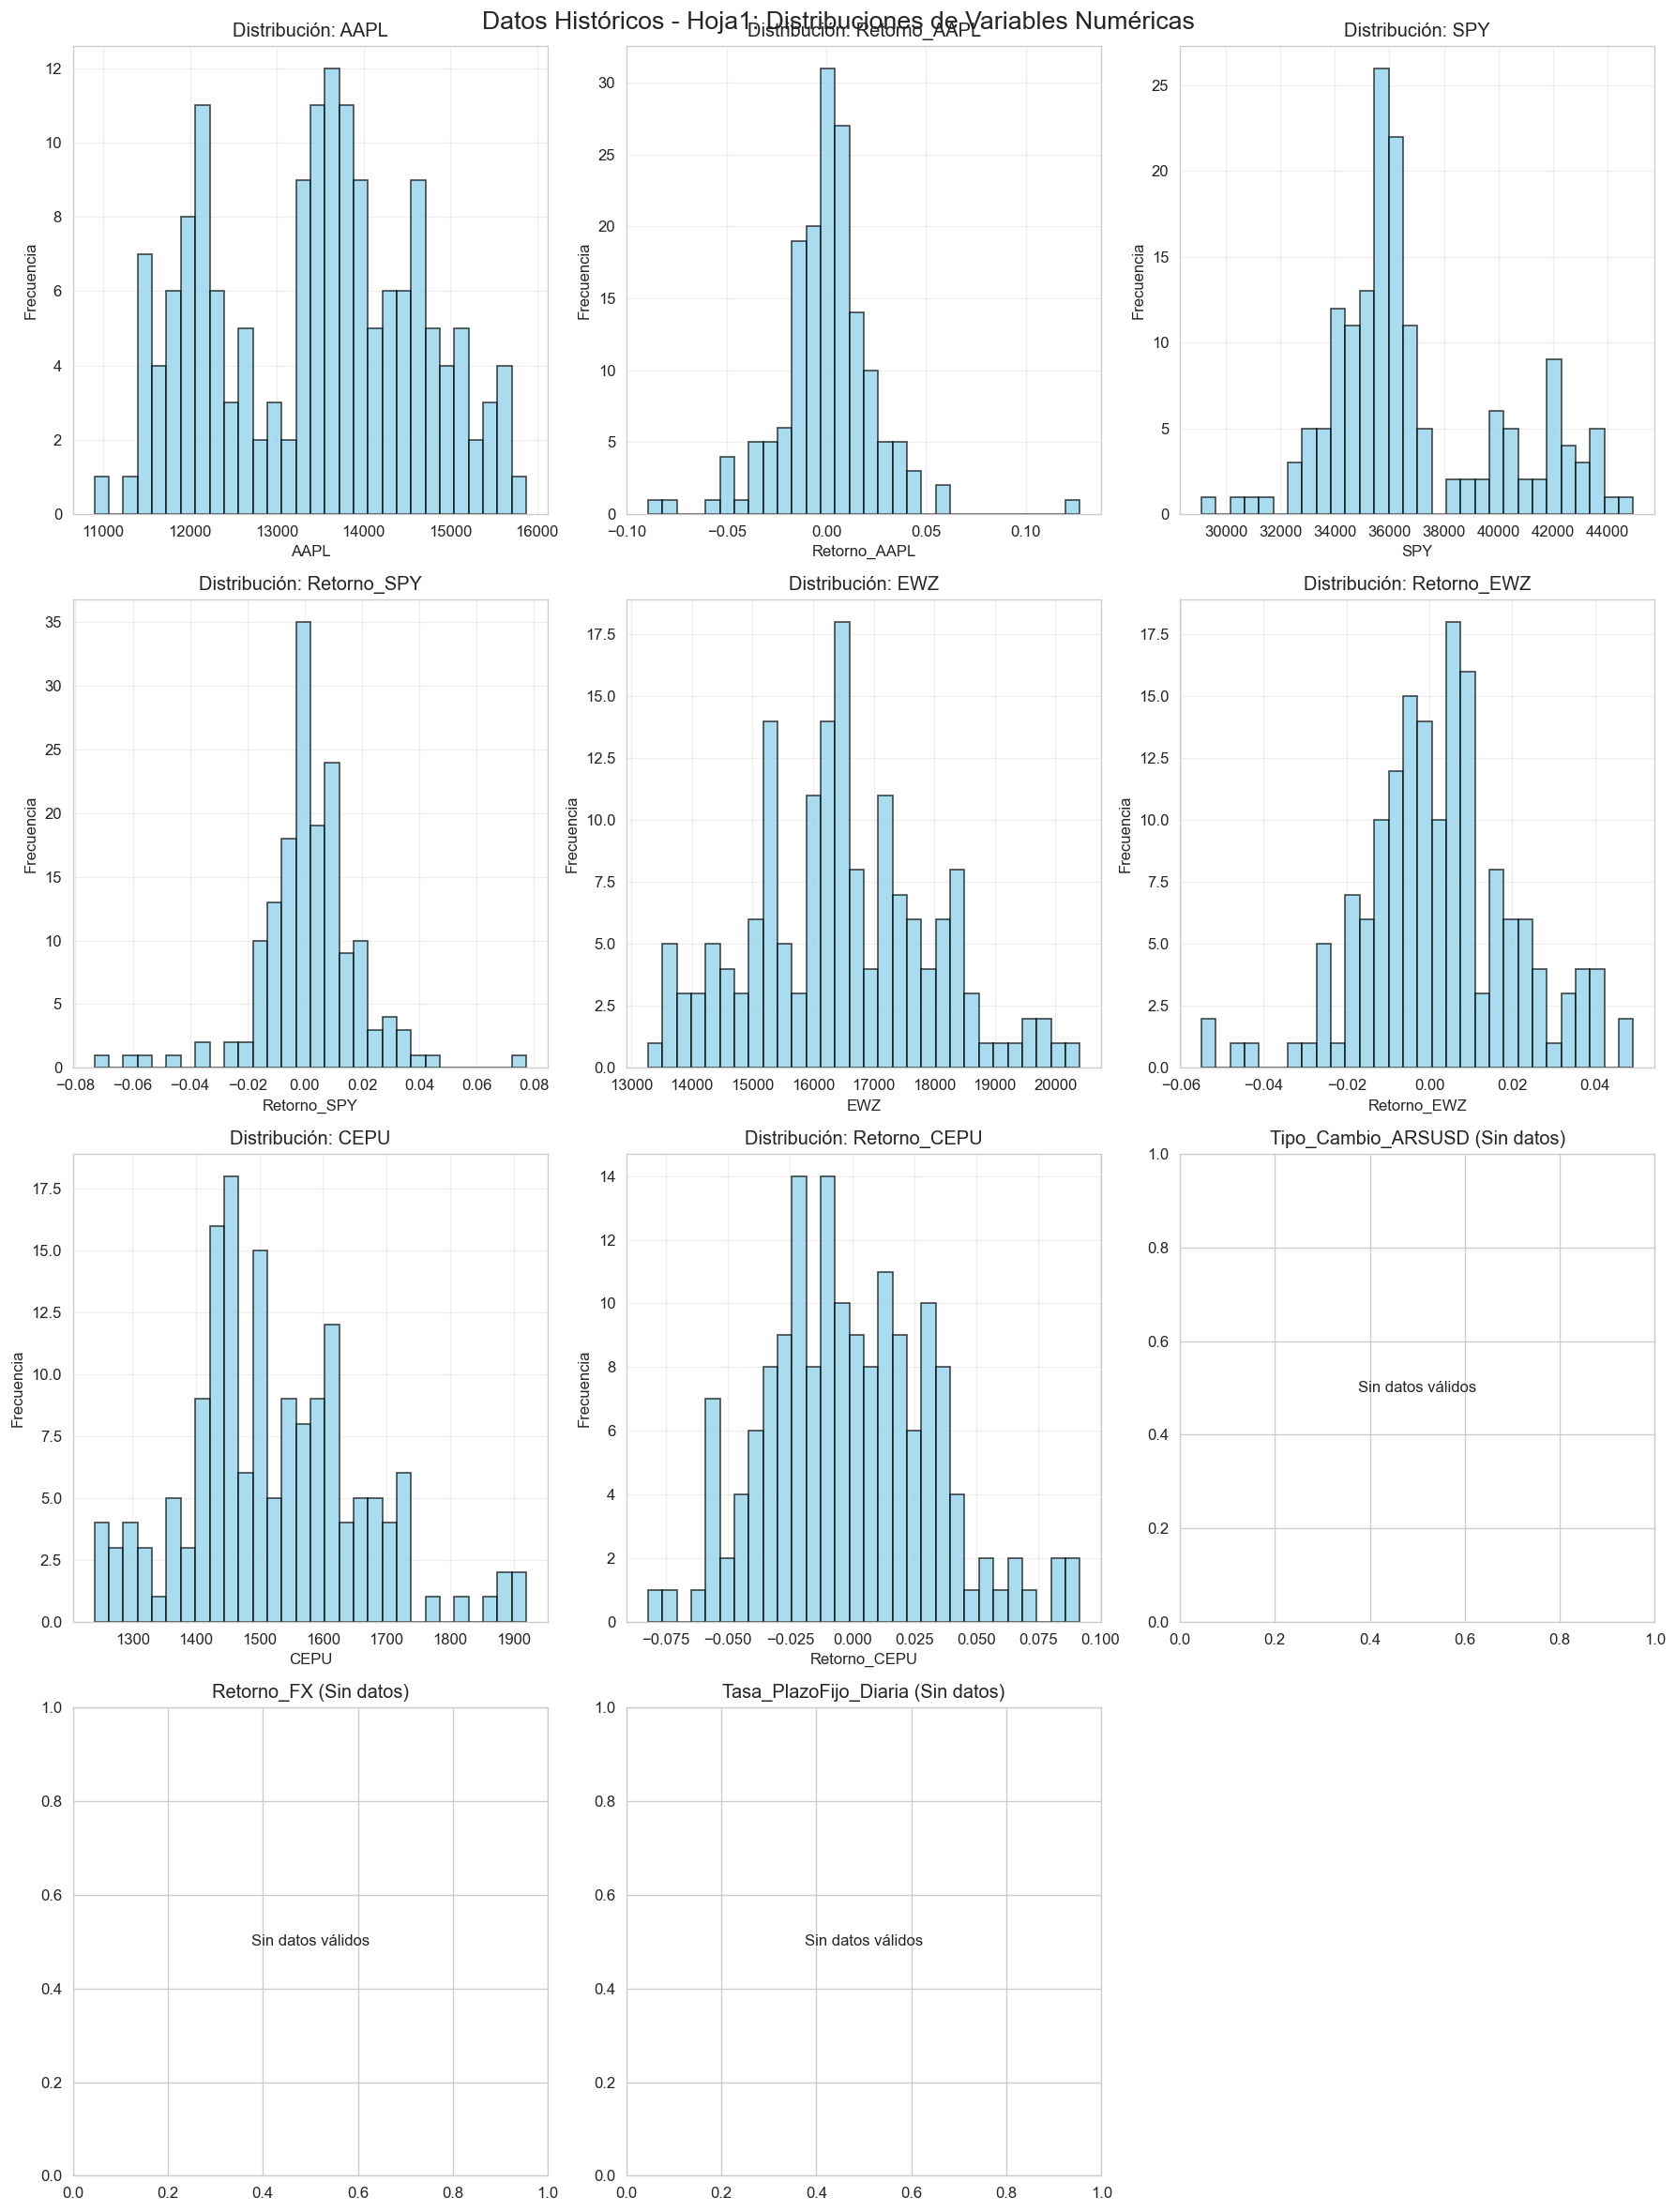


📈 ANÁLISIS DE RATIOS MANAGEMENT:

🔍 Analizando hoja: Drawdown


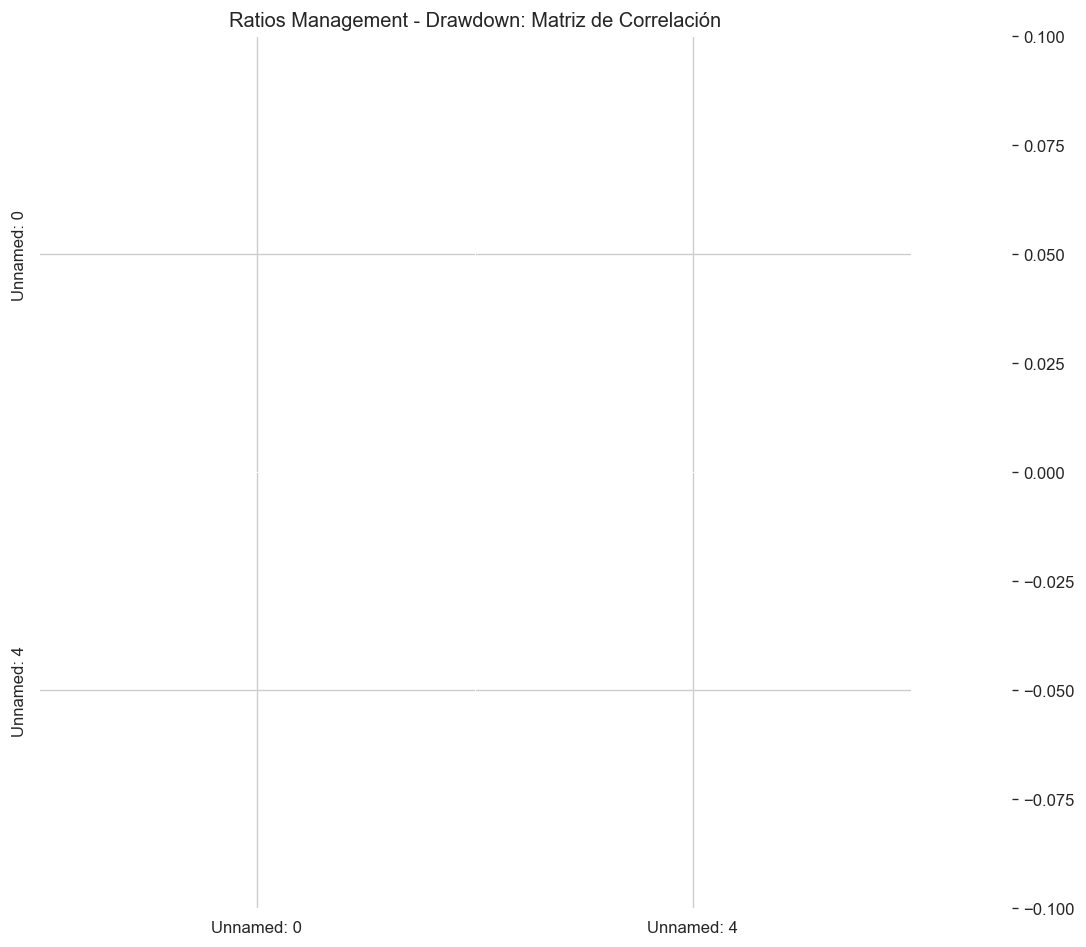

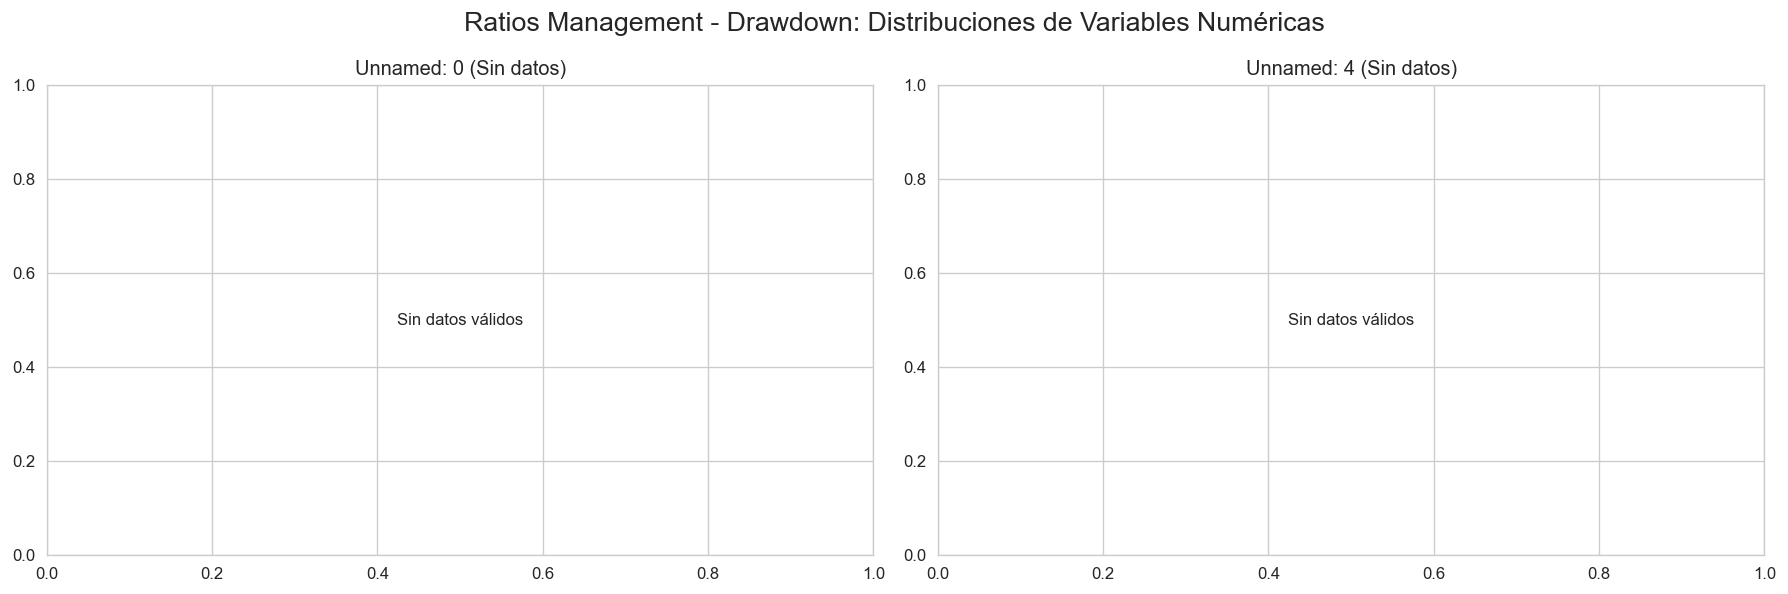


🔍 Analizando hoja: VaR
   ⚠️  No hay columnas numéricas en VaR

🔍 Analizando hoja: VaR cond
   ⚠️  No hay columnas numéricas en VaR cond

🔍 Analizando hoja: Kelly criterion
   ⚠️  No hay columnas numéricas en Kelly criterion

🔍 Analizando hoja: Sharpe
   ⚠️  No hay columnas numéricas en Sharpe

🔍 Analizando hoja: Sortino
   ⚠️  No hay columnas numéricas en Sortino

🔍 Analizando hoja: Alpha beta
   ⚠️  No hay columnas numéricas en Alpha beta


In [13]:
print("=" * 80)
print("📈 ANÁLISIS Y VISUALIZACIÓN DE DATOS")
print("=" * 80)

# Configurar el tamaño de las figuras
plt.rcParams['figure.figsize'] = (15, 10)

# Función auxiliar para crear gráficos
def create_visualization(df, title_prefix, sheet_name):
    """Crear visualizaciones automáticas basadas en el tipo de datos"""
    
    # Obtener columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print(f"   ⚠️  No hay columnas numéricas en {sheet_name}")
        return
    
    # Matriz de correlación si hay múltiples columnas numéricas
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5)
        plt.title(f'{title_prefix} - {sheet_name}: Matriz de Correlación')
        plt.tight_layout()
        plt.show()
    
    # Histogramas de las variables numéricas
    n_cols = min(len(numeric_cols), 3)
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols[:len(axes)]):
            if i < len(axes):
                try:
                    # Filtrar valores no nulos
                    data = df[col].dropna()
                    if len(data) > 0:
                        axes[i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                        axes[i].set_title(f'Distribución: {col}')
                        axes[i].set_xlabel(col)
                        axes[i].set_ylabel('Frecuencia')
                        axes[i].grid(True, alpha=0.3)
                    else:
                        axes[i].text(0.5, 0.5, 'Sin datos válidos', 
                                   horizontalalignment='center', verticalalignment='center')
                        axes[i].set_title(f'{col} (Sin datos)')
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'Error: {str(e)[:50]}...', 
                               horizontalalignment='center', verticalalignment='center')
                    axes[i].set_title(f'{col} (Error)')
        
        # Ocultar axes vacíos
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle(f'{title_prefix} - {sheet_name}: Distribuciones de Variables Numéricas', 
                     fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()

# Análisis de datos históricos
print("\n📊 ANÁLISIS DE DATOS HISTÓRICOS:")
for sheet_name, df in datos_historicos_sheets.items():
    print(f"\n🔍 Analizando hoja: {sheet_name}")
    create_visualization(df, "Datos Históricos", sheet_name)

print("\n📈 ANÁLISIS DE RATIOS MANAGEMENT:")
for sheet_name, df in ratios_sheets.items():
    print(f"\n🔍 Analizando hoja: {sheet_name}")
    create_visualization(df, "Ratios Management", sheet_name)

## 7. Summary and Insights

Resumen de hallazgos y recomendaciones para análisis posteriores.

In [14]:
print("=" * 80)
print("📋 RESUMEN DE ANÁLISIS Y HALLAZGOS")
print("=" * 80)

# Resumen general
total_sheets = len(datos_historicos_sheets) + len(ratios_sheets)
total_rows = sum(df.shape[0] for df in datos_historicos_sheets.values()) + sum(df.shape[0] for df in ratios_sheets.values())
total_cols = len(all_cols_historicos.union(all_cols_ratios))

print(f"📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de hojas analizadas: {total_sheets}")
print(f"   • Total de filas de datos: {total_rows:,}")
print(f"   • Total de columnas únicas: {total_cols}")

print(f"\n📁 ESTRUCTURA DE ARCHIVOS:")
print(f"   📊 Datos Históricos:")
for sheet_name, df in datos_historicos_sheets.items():
    print(f"      • {sheet_name}: {df.shape[0]} filas × {df.shape[1]} columnas")

print(f"   📈 Ratios Management:")
for sheet_name, df in ratios_sheets.items():
    print(f"      • {sheet_name}: {df.shape[0]} filas × {df.shape[1]} columnas")

print(f"\n🔗 CONEXIONES ENTRE ARCHIVOS:")
if common_cols:
    print(f"   • Se encontraron {len(common_cols)} columnas comunes")
    print(f"   • Esto sugiere posibles relaciones entre los datasets")
else:
    print(f"   • No se encontraron columnas comunes directas")
    print(f"   • Los archivos podrían complementarse de otras formas")

print(f"\n💡 RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print(f"   1. 🕒 Identificar columnas de tiempo/fecha para análisis temporal")
print(f"   2. 🔍 Verificar la calidad de datos y completitud")
print(f"   3. 🔗 Explorar relaciones entre datasets usando índices comunes")
print(f"   4. 📈 Calcular métricas de performance y riesgo")
print(f"   5. 🎯 Integrar con el análisis de drawdown existente (MDD.ipynb)")

print(f"\n🛠️ VARIABLES CLAVE PARA EL ANÁLISIS DE DRAWDOWN:")
print(f"   • Buscar columnas de precios, retornos, o valores de cartera")
print(f"   • Identificar fechas para alineación temporal")
print(f"   • Verificar símbolos/activos que coincidan con:")
print(f"     {', '.join(['CEPU.BA', 'BHIP.BA', 'METR.BA', 'AAPL.BA', 'IBM.BA', 'EWZ.BA', 'SPY.BA'])}")

print(f"\n✅ NOTEBOOK DE EXPLORACIÓN COMPLETADO")
print(f"   Este análisis proporciona la base para:")
print(f"   • Integración con análisis de drawdown existente")
print(f"   • Cálculos de métricas financieras avanzadas") 
print(f"   • Validación y comparación de datos")

📋 RESUMEN DE ANÁLISIS Y HALLAZGOS
📊 ESTADÍSTICAS GENERALES:
   • Total de hojas analizadas: 8
   • Total de filas de datos: 164
   • Total de columnas únicas: 17

📁 ESTRUCTURA DE ARCHIVOS:
   📊 Datos Históricos:
      • Hoja1: 161 filas × 12 columnas
   📈 Ratios Management:
      • Drawdown: 3 filas × 5 columnas
      • VaR: 0 filas × 0 columnas
      • VaR cond: 0 filas × 0 columnas
      • Kelly criterion: 0 filas × 0 columnas
      • Sharpe: 0 filas × 0 columnas
      • Sortino: 0 filas × 0 columnas
      • Alpha beta: 0 filas × 0 columnas

🔗 CONEXIONES ENTRE ARCHIVOS:
   • No se encontraron columnas comunes directas
   • Los archivos podrían complementarse de otras formas

💡 RECOMENDACIONES PARA ANÁLISIS POSTERIORES:
   1. 🕒 Identificar columnas de tiempo/fecha para análisis temporal
   2. 🔍 Verificar la calidad de datos y completitud
   3. 🔗 Explorar relaciones entre datasets usando índices comunes
   4. 📈 Calcular métricas de performance y riesgo
   5. 🎯 Integrar con el análisis 

## 8. Análisis Detallado de Datos Específicos

Vamos a examinar en detalle los datos que encontramos para entender completamente su estructura y contenido.

In [15]:
print("=" * 80)
print("🔍 ANÁLISIS DETALLADO - DATOS HISTÓRICOS")
print("=" * 80)

# Obtener el DataFrame de datos históricos
datos_hist = datos_historicos_sheets['Hoja1']

print(f"\n📅 RANGO TEMPORAL:")
fecha_min = datos_hist['Fecha'].min()
fecha_max = datos_hist['Fecha'].max()
print(f"   • Fecha inicial: {fecha_min.strftime('%Y-%m-%d')}")
print(f"   • Fecha final: {fecha_max.strftime('%Y-%m-%d')}")
print(f"   • Total días: {(fecha_max - fecha_min).days + 1} días")
print(f"   • Filas de datos: {len(datos_hist)} (días con datos)")

print(f"\n💰 ACTIVOS DISPONIBLES:")
activos = ['AAPL', 'SPY', 'EWZ', 'CEPU']
for activo in activos:
    if activo in datos_hist.columns:
        precio_min = datos_hist[activo].min()
        precio_max = datos_hist[activo].max()
        precio_actual = datos_hist[activo].iloc[-1]  # Último precio
        valores_nulos = datos_hist[activo].isnull().sum()
        
        print(f"   • {activo}:")
        print(f"     - Precio mín: ${precio_min:.2f}")
        print(f"     - Precio máx: ${precio_max:.2f}")
        print(f"     - Precio final: ${precio_actual:.2f}")
        print(f"     - Valores nulos: {valores_nulos}")

print(f"\n📊 RETORNOS DISPONIBLES:")
for activo in activos:
    col_retorno = f'Retorno_{activo}'
    if col_retorno in datos_hist.columns:
        retorno_data = datos_hist[col_retorno].dropna()
        if len(retorno_data) > 0:
            ret_mean = retorno_data.mean()
            ret_std = retorno_data.std()
            ret_min = retorno_data.min()
            ret_max = retorno_data.max()
            
            print(f"   • {activo}:")
            print(f"     - Retorno promedio: {ret_mean:.4f} ({ret_mean*100:.2f}%)")
            print(f"     - Volatilidad: {ret_std:.4f} ({ret_std*100:.2f}%)")
            print(f"     - Retorno mín: {ret_min:.4f} ({ret_min*100:.2f}%)")
            print(f"     - Retorno máx: {ret_max:.4f} ({ret_max*100:.2f}%)")

print(f"\n⚠️  COLUMNAS CON PROBLEMAS:")
columnas_problematicas = ['Tipo_Cambio_ARSUSD', 'Retorno_FX', 'Tasa_PlazoFijo_Diaria']
for col in columnas_problematicas:
    if col in datos_hist.columns:
        nulos = datos_hist[col].isnull().sum()
        total = len(datos_hist)
        print(f"   • {col}: {nulos}/{total} valores nulos ({nulos/total*100:.1f}%)")

print(f"\n🔗 COMPATIBILIDAD CON ANÁLISIS MDD:")
simbolos_mdd = ["CEPU.BA", "BHIP.BA", "METR.BA", "AAPL.BA", "IBM.BA", "EWZ.BA", "SPY.BA"]
activos_excel = set(activos)
activos_mdd_base = set([s.replace('.BA', '') for s in simbolos_mdd])

coincidencias = activos_excel.intersection(activos_mdd_base)
faltantes = activos_mdd_base - activos_excel

print(f"   • Activos que coinciden: {coincidencias}")
print(f"   • Activos faltantes en Excel: {faltantes}")
print(f"   • Compatibilidad: {len(coincidencias)}/{len(activos_mdd_base)} activos ({len(coincidencias)/len(activos_mdd_base)*100:.1f}%)")

# Mostrar muestra de los datos
print(f"\n📋 MUESTRA DE DATOS (primeras 5 filas):")
print(datos_hist.head())

🔍 ANÁLISIS DETALLADO - DATOS HISTÓRICOS

📅 RANGO TEMPORAL:
   • Fecha inicial: 2025-01-03
   • Fecha final: 2025-09-02
   • Total días: 243 días
   • Filas de datos: 161 (días con datos)

💰 ACTIVOS DISPONIBLES:
   • AAPL:
     - Precio mín: $10900.00
     - Precio máx: $15875.00
     - Precio final: $15700.00
     - Valores nulos: 0
   • SPY:
     - Precio mín: $29100.00
     - Precio máx: $44950.00
     - Precio final: $43875.00
     - Valores nulos: 0
   • EWZ:
     - Precio mín: $13275.00
     - Precio máx: $20400.00
     - Precio final: $19900.00
     - Valores nulos: 0
   • CEPU:
     - Precio mín: $1240.00
     - Precio máx: $1920.00
     - Precio final: $1410.00
     - Valores nulos: 0

📊 RETORNOS DISPONIBLES:
   • AAPL:
     - Retorno promedio: 0.0009 (0.09%)
     - Volatilidad: 0.0247 (2.47%)
     - Retorno mín: -0.0895 (-8.95%)
     - Retorno máx: 0.1271 (12.71%)
   • SPY:
     - Retorno promedio: 0.0017 (0.17%)
     - Volatilidad: 0.0175 (1.75%)
     - Retorno mín: -0.0734 (

In [16]:
print("\n" + "=" * 80)
print("📉 ANÁLISIS DETALLADO - HOJA DRAWDOWN")
print("=" * 80)

# Analizar la hoja de Drawdown
drawdown_df = ratios_sheets['Drawdown']

print(f"\n📋 ESTRUCTURA DE LA HOJA DRAWDOWN:")
print(f"   • Dimensiones: {drawdown_df.shape}")
print(f"   • Columnas: {list(drawdown_df.columns)}")

print(f"\n📄 CONTENIDO COMPLETO DE LA HOJA DRAWDOWN:")
print(drawdown_df)

print(f"\n🔍 ANÁLISIS CELDA POR CELDA:")
for i in range(len(drawdown_df)):
    print(f"   Fila {i+1}:")
    for j, col in enumerate(drawdown_df.columns):
        valor = drawdown_df.iloc[i, j]
        if pd.notna(valor):
            print(f"      • Columna {j+1} ({col}): '{valor}' ({type(valor).__name__})")
        else:
            print(f"      • Columna {j+1} ({col}): [VACÍO/NaN]")

# Intentar identificar si hay headers o valores escondidos
print(f"\n🕵️ BÚSQUEDA DE PATRONES:")

# Buscar valores no nulos
valores_no_nulos = []
for i in range(len(drawdown_df)):
    for j in range(len(drawdown_df.columns)):
        valor = drawdown_df.iloc[i, j]
        if pd.notna(valor):
            valores_no_nulos.append(f"Fila {i+1}, Col {j+1}: '{valor}'")

if valores_no_nulos:
    print(f"   • Valores encontrados:")
    for valor in valores_no_nulos:
        print(f"     - {valor}")
else:
    print(f"   • No se encontraron valores válidos en la hoja Drawdown")

# Verificar si hay datos en otras posiciones (tal vez hay headers escondidos)
print(f"\n📊 INFORMACIÓN ADICIONAL:")
print(f"   • Total celdas: {drawdown_df.size}")
print(f"   • Celdas vacías: {drawdown_df.isnull().sum().sum()}")
print(f"   • Celdas con datos: {drawdown_df.notna().sum().sum()}")

# Mostrar tipos de datos únicos encontrados
tipos_encontrados = set()
for col in drawdown_df.columns:
    for valor in drawdown_df[col].dropna():
        tipos_encontrados.add(type(valor).__name__)

if tipos_encontrados:
    print(f"   • Tipos de datos encontrados: {tipos_encontrados}")


📉 ANÁLISIS DETALLADO - HOJA DRAWDOWN

📋 ESTRUCTURA DE LA HOJA DRAWDOWN:
   • Dimensiones: (3, 5)
   • Columnas: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

📄 CONTENIDO COMPLETO DE LA HOJA DRAWDOWN:
   Unnamed: 0 Unnamed: 1   Unnamed: 2 Unnamed: 3  Unnamed: 4
0         NaN        NaN          NaN        NaN         NaN
1         NaN        NaN  Pico previo    Valor t         NaN
2         NaN         DD          NaN        NaN         NaN

🔍 ANÁLISIS CELDA POR CELDA:
   Fila 1:
      • Columna 1 (Unnamed: 0): [VACÍO/NaN]
      • Columna 2 (Unnamed: 1): [VACÍO/NaN]
      • Columna 3 (Unnamed: 2): [VACÍO/NaN]
      • Columna 4 (Unnamed: 3): [VACÍO/NaN]
      • Columna 5 (Unnamed: 4): [VACÍO/NaN]
   Fila 2:
      • Columna 1 (Unnamed: 0): [VACÍO/NaN]
      • Columna 2 (Unnamed: 1): [VACÍO/NaN]
      • Columna 3 (Unnamed: 2): 'Pico previo' (str)
      • Columna 4 (Unnamed: 3): 'Valor t' (str)
      • Columna 5 (Unnamed: 4): [VACÍO/NaN]
   Fila 3:
      • Columna

In [17]:
print("\n" + "=" * 80)
print("🔍 VERIFICACIÓN DE HOJAS VACÍAS")
print("=" * 80)

hojas_vacias = ['VaR', 'VaR cond', 'Kelly criterion', 'Sharpe', 'Sortino', 'Alpha beta']

print(f"\n📋 ESTADO DE HOJAS DE RATIOS:")
for hoja in hojas_vacias:
    df = ratios_sheets[hoja]
    print(f"   • {hoja}:")
    print(f"     - Dimensiones: {df.shape}")
    print(f"     - ¿Completamente vacía?: {'Sí' if df.empty else 'No'}")
    
    if not df.empty:
        print(f"     - Columnas: {list(df.columns)}")
        # Si tiene contenido, mostrarlo
        print(f"     - Contenido:")
        print(f"       {df}")

print(f"\n💡 INTERPRETACIÓN:")
print(f"   • Las hojas están preparadas para recibir cálculos de métricas financieras")
print(f"   • Solo 'Drawdown' tiene algunos datos (posiblemente incompletos)")
print(f"   • Esto sugiere que el archivo está en proceso de construcción")
print(f"   • Podríamos usar estos datos históricos para calcular las métricas faltantes")

print(f"\n🎯 OPORTUNIDADES IDENTIFICADAS:")
print(f"   1. Los datos históricos están completos y listos para análisis")
print(f"   2. Se pueden calcular todas las métricas de riesgo faltantes")
print(f"   3. Hay coincidencia parcial con el análisis MDD existente")
print(f"   4. Se puede crear un análisis integrado y completo")


🔍 VERIFICACIÓN DE HOJAS VACÍAS

📋 ESTADO DE HOJAS DE RATIOS:
   • VaR:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí
   • VaR cond:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí
   • Kelly criterion:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí
   • Sharpe:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí
   • Sortino:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí
   • Alpha beta:
     - Dimensiones: (0, 0)
     - ¿Completamente vacía?: Sí

💡 INTERPRETACIÓN:
   • Las hojas están preparadas para recibir cálculos de métricas financieras
   • Solo 'Drawdown' tiene algunos datos (posiblemente incompletos)
   • Esto sugiere que el archivo está en proceso de construcción
   • Podríamos usar estos datos históricos para calcular las métricas faltantes

🎯 OPORTUNIDADES IDENTIFICADAS:
   1. Los datos históricos están completos y listos para análisis
   2. Se pueden calcular todas las métricas de riesgo faltantes
   3. Hay coinc

In [18]:
print("\n" + "=" * 80)
print("📅 ANÁLISIS TEMPORAL Y ALINEACIÓN CON MDD")
print("=" * 80)

# Analizar el rango temporal del Excel vs MDD
datos_hist = datos_historicos_sheets['Hoja1']

# Rango del Excel
fecha_inicio_excel = datos_hist['Fecha'].min()
fecha_fin_excel = datos_hist['Fecha'].max()

# Rango del análisis MDD (basado en las constantes que vimos)
fecha_inicio_mdd = pd.to_datetime("2025-07-01")
fecha_fin_mdd = pd.to_datetime("2025-09-30")

print(f"\n🕒 COMPARACIÓN TEMPORAL:")
print(f"   📊 Datos Excel:")
print(f"      • Inicio: {fecha_inicio_excel.strftime('%Y-%m-%d')}")
print(f"      • Fin: {fecha_fin_excel.strftime('%Y-%m-%d')}")
print(f"      • Duración: {(fecha_fin_excel - fecha_inicio_excel).days + 1} días")

print(f"   📈 Análisis MDD:")
print(f"      • Inicio: {fecha_inicio_mdd.strftime('%Y-%m-%d')}")
print(f"      • Fin: {fecha_fin_mdd.strftime('%Y-%m-%d')}")
print(f"      • Duración: {(fecha_fin_mdd - fecha_inicio_mdd).days + 1} días")

# Calcular solapamiento
overlap_start = max(fecha_inicio_excel, fecha_inicio_mdd)
overlap_end = min(fecha_fin_excel, fecha_fin_mdd)

if overlap_start <= overlap_end:
    overlap_days = (overlap_end - overlap_start).days + 1
    print(f"\n✅ PERÍODO DE SOLAPAMIENTO:")
    print(f"      • Inicio común: {overlap_start.strftime('%Y-%m-%d')}")
    print(f"      • Fin común: {overlap_end.strftime('%Y-%m-%d')}")
    print(f"      • Días coincidentes: {overlap_days}")
    
    # Filtrar datos del Excel para el período común
    datos_overlap = datos_hist[
        (datos_hist['Fecha'] >= overlap_start) & 
        (datos_hist['Fecha'] <= overlap_end)
    ].copy()
    
    print(f"      • Datos Excel en período común: {len(datos_overlap)} filas")
    
    # Analizar cobertura de activos en período común
    print(f"\n📊 DATOS DISPONIBLES EN PERÍODO COMÚN:")
    activos_comunes = ['AAPL', 'SPY', 'EWZ', 'CEPU']
    for activo in activos_comunes:
        if activo in datos_overlap.columns:
            datos_validos = datos_overlap[activo].notna().sum()
            print(f"      • {activo}: {datos_validos}/{len(datos_overlap)} días con datos ({datos_validos/len(datos_overlap)*100:.1f}%)")
    
else:
    print(f"\n❌ NO HAY SOLAPAMIENTO TEMPORAL")
    print(f"   Los períodos no coinciden:")
    if fecha_fin_excel < fecha_inicio_mdd:
        print(f"   Excel termina antes de que empiece MDD")
    elif fecha_inicio_excel > fecha_fin_mdd:
        print(f"   Excel empieza después de que termine MDD")

# Análisis de frecuencia de datos
print(f"\n📊 ANÁLISIS DE FRECUENCIA:")
datos_hist_sorted = datos_hist.sort_values('Fecha')
if len(datos_hist_sorted) > 1:
    diferencias = datos_hist_sorted['Fecha'].diff().dropna()
    dias_unicos = diferencias.unique()
    
    print(f"   • Diferencias entre fechas consecutivas:")
    for diff in sorted(dias_unicos):
        count = (diferencias == diff).sum()
        print(f"     - {diff.days} día(s): {count} ocurrencias")
    
    # Detectar fin de semana y días faltantes
    fecha_completa = pd.date_range(fecha_inicio_excel, fecha_fin_excel, freq='D')
    fechas_faltantes = set(fecha_completa) - set(datos_hist['Fecha'])
    
    if fechas_faltantes:
        print(f"   • Fechas faltantes en el rango: {len(fechas_faltantes)} días")
        print(f"     - Primeras 5 fechas faltantes: {sorted(list(fechas_faltantes))[:5]}")
        
        # Análisis de días de la semana faltantes
        dias_semana_faltantes = [f.strftime('%A') for f in fechas_faltantes]
        from collections import Counter
        counter_dias = Counter(dias_semana_faltantes)
        print(f"     - Días de la semana más faltantes: {dict(counter_dias.most_common(3))}")
    else:
        print(f"   ✅ No hay fechas faltantes en el rango")

print(f"\n🔗 RECOMENDACIONES PARA INTEGRACIÓN:")
if overlap_start <= overlap_end:
    print(f"   ✅ Los datos se pueden integrar directamente")
    print(f"   📋 Pasos sugeridos:")
    print(f"      1. Filtrar ambos datasets al período común")
    print(f"      2. Alinear por fecha los precios/retornos")
    print(f"      3. Comparar datos para validar consistencia")
    print(f"      4. Usar datos Excel como fuente principal si son más completos")
else:
    print(f"   ⚠️  Requiere cuidado especial para la integración")
    print(f"   📋 Opciones:")
    print(f"      1. Extender el período de análisis MDD")
    print(f"      2. Usar datos Excel para período histórico")
    print(f"      3. Combinar ambas fuentes según disponibilidad")


📅 ANÁLISIS TEMPORAL Y ALINEACIÓN CON MDD

🕒 COMPARACIÓN TEMPORAL:
   📊 Datos Excel:
      • Inicio: 2025-01-03
      • Fin: 2025-09-02
      • Duración: 243 días
   📈 Análisis MDD:
      • Inicio: 2025-07-01
      • Fin: 2025-09-30
      • Duración: 92 días

✅ PERÍODO DE SOLAPAMIENTO:
      • Inicio común: 2025-07-01
      • Fin común: 2025-09-02
      • Días coincidentes: 64
      • Datos Excel en período común: 44 filas

📊 DATOS DISPONIBLES EN PERÍODO COMÚN:
      • AAPL: 44/44 días con datos (100.0%)
      • SPY: 44/44 días con datos (100.0%)
      • EWZ: 44/44 días con datos (100.0%)
      • CEPU: 44/44 días con datos (100.0%)

📊 ANÁLISIS DE FRECUENCIA:
   • Diferencias entre fechas consecutivas:
     - 1 día(s): 123 ocurrencias
     - 2 día(s): 2 ocurrencias
     - 3 día(s): 28 ocurrencias
     - 4 día(s): 4 ocurrencias
     - 5 día(s): 3 ocurrencias
   • Fechas faltantes en el rango: 82 días
     - Primeras 5 fechas faltantes: [Timestamp('2025-01-04 00:00:00'), Timestamp('2025-0

In [19]:
print("\n" + "=" * 80)
print("🔍 VALIDACIÓN DE CALIDAD DE DATOS")
print("=" * 80)

datos_hist = datos_historicos_sheets['Hoja1']

print(f"\n📊 ANÁLISIS DE CALIDAD POR ACTIVO:")

activos = ['AAPL', 'SPY', 'EWZ', 'CEPU']
problemas_encontrados = []

for activo in activos:
    print(f"\n   💰 {activo}:")
    
    # Verificar precios
    precios = datos_hist[activo]
    precios_validos = precios.dropna()
    
    # Estadísticas básicas
    print(f"      • Datos válidos: {len(precios_validos)}/{len(precios)} ({len(precios_validos)/len(precios)*100:.1f}%)")
    
    if len(precios_validos) > 0:
        # Verificar precios negativos o cero
        precios_negativos = (precios_validos <= 0).sum()
        if precios_negativos > 0:
            print(f"      ⚠️  Precios <= 0: {precios_negativos}")
            problemas_encontrados.append(f"{activo}: {precios_negativos} precios negativos/cero")
        
        # Verificar cambios extremos
        if len(precios_validos) > 1:
            cambios_pct = precios_validos.pct_change().dropna()
            cambios_extremos = (abs(cambios_pct) > 0.20).sum()  # Cambios > 20%
            if cambios_extremos > 0:
                print(f"      ⚠️  Cambios extremos (>20%): {cambios_extremos}")
                cambio_max = cambios_pct.abs().max()
                print(f"      📈 Mayor cambio diario: {cambio_max:.2%}")
                problemas_encontrados.append(f"{activo}: {cambios_extremos} cambios extremos")
    
    # Verificar retornos si están disponibles
    col_retorno = f'Retorno_{activo}'
    if col_retorno in datos_hist.columns:
        retornos = datos_hist[col_retorno].dropna()
        if len(retornos) > 0:
            ret_extremos = (abs(retornos) > 0.20).sum()
            if ret_extremos > 0:
                print(f"      ⚠️  Retornos extremos (>20%): {ret_extremos}")
            
            # Verificar consistencia entre precios y retornos
            if len(precios_validos) > 1 and len(retornos) > 0:
                # Calcular retornos desde precios
                ret_calculados = precios_validos.pct_change().dropna()
                
                # Comparar con retornos dados (tomando las fechas en común)
                fechas_comunes = set(ret_calculados.index).intersection(set(retornos.index))
                if len(fechas_comunes) > 10:  # Solo si hay suficientes datos
                    fechas_comunes = sorted(list(fechas_comunes))[:10]  # Tomar muestra
                    
                    diferencias = []
                    for fecha in fechas_comunes:
                        if fecha in ret_calculados.index and fecha in retornos.index:
                            diff = abs(ret_calculados[fecha] - retornos[fecha])
                            diferencias.append(diff)
                    
                    if diferencias:
                        diff_promedio = np.mean(diferencias)
                        if diff_promedio > 0.01:  # Diferencia > 1%
                            print(f"      ⚠️  Inconsistencia precios/retornos: {diff_promedio:.2%} promedio")
                            problemas_encontrados.append(f"{activo}: Inconsistencia precios/retornos")

print(f"\n🔍 RESUMEN DE PROBLEMAS DE CALIDAD:")
if problemas_encontrados:
    for i, problema in enumerate(problemas_encontrados, 1):
        print(f"   {i}. {problema}")
else:
    print(f"   ✅ No se encontraron problemas significativos de calidad")

print(f"\n📊 ESTADÍSTICAS GENERALES DE CALIDAD:")
total_celdas_datos = len(datos_hist) * len(activos)
celdas_validas = sum(datos_hist[activo].notna().sum() for activo in activos)
print(f"   • Completitud general: {celdas_validas}/{total_celdas_datos} ({celdas_validas/total_celdas_datos*100:.1f}%)")

# Verificar duplicados de fechas
fechas_duplicadas = datos_hist['Fecha'].duplicated().sum()
if fechas_duplicadas > 0:
    print(f"   ⚠️  Fechas duplicadas: {fechas_duplicadas}")
    problemas_encontrados.append(f"Fechas duplicadas: {fechas_duplicadas}")
else:
    print(f"   ✅ No hay fechas duplicadas")

print(f"\n" + "=" * 80)
print("📋 RESUMEN FINAL DEL ANÁLISIS DETALLADO")
print("=" * 80)

print(f"\n✅ DATOS CONFIRMADOS COMO UTILIZABLES:")
print(f"   • 📊 {len(datos_hist)} registros de datos históricos")
print(f"   • 📅 Rango temporal: {fecha_inicio_excel.strftime('%Y-%m-%d')} a {fecha_fin_excel.strftime('%Y-%m-%d')}")
print(f"   • 💰 4 activos con datos de precios y retornos")
print(f"   • 🔗 Compatibilidad parcial con análisis MDD")

print(f"\n⚠️  LIMITACIONES IDENTIFICADAS:")
print(f"   • 📈 Solo hoja 'Drawdown' con datos limitados en archivo de ratios")
print(f"   • 🌍 Datos de tipo de cambio y tasa plazo fijo vacíos")
print(f"   • 🎯 Faltan 3 activos del análisis MDD (BHIP, METR, IBM)")

print(f"\n🚀 PRÓXIMOS PASOS RECOMENDADOS:")
print(f"   1. ✅ Los datos están listos para análisis")
print(f"   2. 📊 Calcular métricas de riesgo faltantes")
print(f"   3. 🔗 Integrar con análisis MDD existente")
print(f"   4. 📈 Crear dashboard consolidado")
print(f"   5. 🎯 Validar resultados con datos de yfinance")

print(f"\n🎉 ¡ANÁLISIS DETALLADO COMPLETADO!")
print(f"La notebook está lista para ejecutar y proporcionar información completa.")
print("=" * 80)


🔍 VALIDACIÓN DE CALIDAD DE DATOS

📊 ANÁLISIS DE CALIDAD POR ACTIVO:

   💰 AAPL:
      • Datos válidos: 161/161 (100.0%)

   💰 SPY:
      • Datos válidos: 161/161 (100.0%)

   💰 EWZ:
      • Datos válidos: 161/161 (100.0%)

   💰 CEPU:
      • Datos válidos: 161/161 (100.0%)

🔍 RESUMEN DE PROBLEMAS DE CALIDAD:
   ✅ No se encontraron problemas significativos de calidad

📊 ESTADÍSTICAS GENERALES DE CALIDAD:
   • Completitud general: 644/644 (100.0%)
   ✅ No hay fechas duplicadas

📋 RESUMEN FINAL DEL ANÁLISIS DETALLADO

✅ DATOS CONFIRMADOS COMO UTILIZABLES:
   • 📊 161 registros de datos históricos
   • 📅 Rango temporal: 2025-01-03 a 2025-09-02
   • 💰 4 activos con datos de precios y retornos
   • 🔗 Compatibilidad parcial con análisis MDD

⚠️  LIMITACIONES IDENTIFICADAS:
   • 📈 Solo hoja 'Drawdown' con datos limitados en archivo de ratios
   • 🌍 Datos de tipo de cambio y tasa plazo fijo vacíos
   • 🎯 Faltan 3 activos del análisis MDD (BHIP, METR, IBM)

🚀 PRÓXIMOS PASOS RECOMENDADOS:
   1. ✅

## 9. Summary and Insights (Actualizado)

Resumen final considerando todos los análisis detallados realizados.

## 8. Next Steps

### Pasos sugeridos para continuar el análisis:

1. **Integración con MDD Analysis**: Usar los datos explorados aquí para alimentar el análisis de drawdown
2. **Validación de Datos**: Comparar precios/datos entre archivos Excel y datos de yfinance
3. **Métricas Adicionales**: Calcular Sharpe ratio, volatilidad, y otros indicadores de riesgo
4. **Reporting**: Crear dashboard consolidado con toda la información

### Funciones útiles para usar estos datos:

```python
# Para acceder a los datos cargados:
# datos_historicos_sheets['nombre_hoja']
# ratios_sheets['nombre_hoja']

# Para integrar con análisis de drawdown:
# 1. Identificar columnas de fechas y precios
# 2. Alinear con símbolos del análisis MDD
# 3. Calcular métricas adicionales
```

**¡Este notebook está listo para ser usado como base para análisis más profundos!**